# Pré-processing des données de test

## 1. Importation des librairies

In [20]:
from rembg import remove
from PIL import Image
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

## 2. Suppression du fond des images

In [3]:
def countoring_one_pic_backgroudless(image_path):
    
    # if os.path.isfile(full_path):
    full_path = os.path.join('Data/test_image_headmind', image_path)
    input_image = Image.open(full_path)
    output = remove(input_image)
    return output

Obseration de quelques une des images sans fond (ici on voit un fond blanc et on ne le voit pas mais les image sont de dimension 4032x3024)

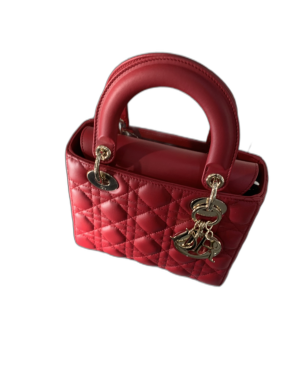

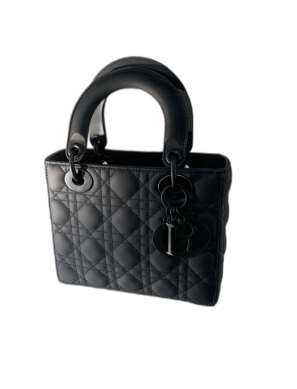

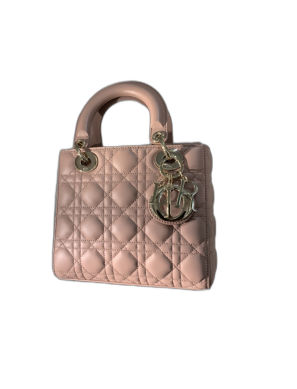

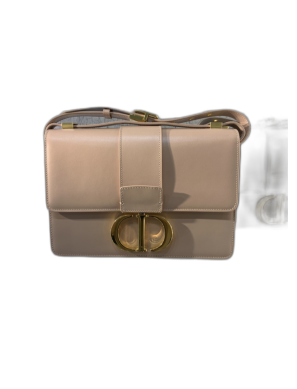

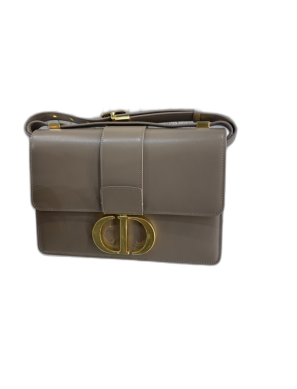

In [8]:
input_paths = os.listdir('Data/test_image_headmind')
#list of all the input image paths  
for image in input_paths[:5]:    
    plt.imshow(countoring_one_pic_backgroudless(image))
    plt.axis('off')
    plt.show()

Image assez nette à part quelques une ou le contour n'est pas très bien fait ou meme très mal fait pour 2 des 80 photos.

## 3. Transformation de photo : resize, centrage, et fond blanc

Le but est de limiter le temps d'execution en diminuant la taille des images et de permettre une meileur interprétation des images en les centrant et en placant un fond blanc comme sur les image de train

In [23]:
def resize_and_center_on_white_background(image_backgroundless, new_size=(256, 256)):
    # image_with_alpha = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    image_with_alpha=np.array(image_backgroundless)
    if image_with_alpha.shape[2] != 4:
        raise ValueError("L'image n'a pas de canal alpha")

    ratio = min(new_size[0] / image_with_alpha.shape[1], new_size[1] / image_with_alpha.shape[0])
    new_dimensions = (int(image_with_alpha.shape[1] * ratio), int(image_with_alpha.shape[0] * ratio))

    resized_image_with_alpha = cv2.resize(image_with_alpha, new_dimensions, interpolation=cv2.INTER_AREA)

    white_background = np.ones((new_size[1], new_size[0], 3), dtype=np.uint8) * 255

    x_offset = (new_size[0] - new_dimensions[0]) // 2
    y_offset = (new_size[1] - new_dimensions[1]) // 2

    y1, y2 = y_offset, y_offset + new_dimensions[1]
    x1, x2 = x_offset, x_offset + new_dimensions[0]

    alpha_s = resized_image_with_alpha[:, :, 3] / 255.0
    alpha_l = 1.0 - alpha_s

    white_background[y1:y2, x1:x2] = white_background[y1:y2, x1:x2] * alpha_l[:, :, np.newaxis] + \
                                     resized_image_with_alpha[:, :, :3] * alpha_s[:, :, np.newaxis]
    
    return white_background

On va regarder ici quel est l'effet de ces transformations

In [17]:
def countoring_one_pic(image_path):
    
    # if os.path.isfile(full_path):
    full_path = os.path.join('Data/test_image_headmind', image_path)
    input_image = Image.open(full_path)
    output = remove(input_image)
    white_background_image = resize_and_center_on_white_background(output)
    return white_background_image

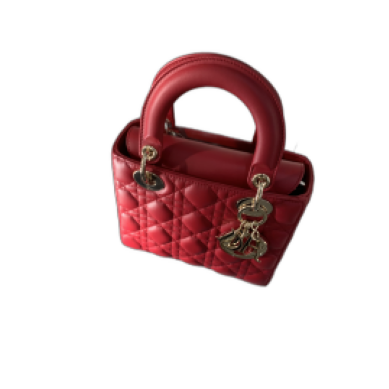

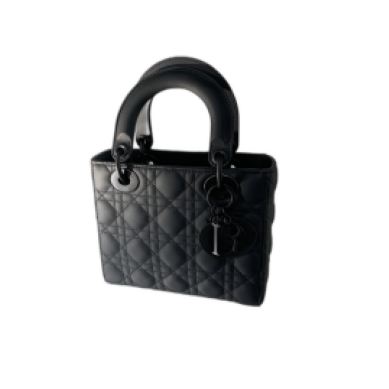

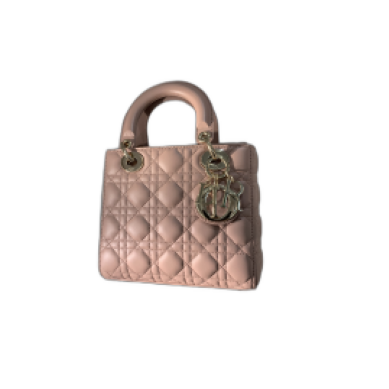

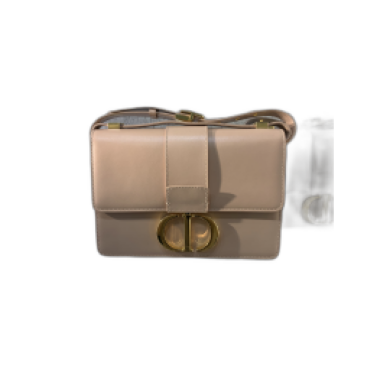

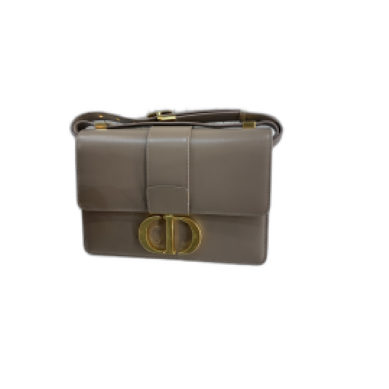

In [10]:
for image in input_paths[:5]:    
    plt.imshow(countoring_one_pic(image))
    plt.axis('off')
    plt.show()

Le script s'execute plus vite mais l'image se degrade légerement. Il peut etre pertinent d'analyser les 2 methodes (avec fond bllanc et sans fond blanc) pour voir celui qui donne les meilleurs resultats. 
PS : Ici in ne le voit pas mais un fond blanc a bien été rajouté et la taille de l'image réduite  256x256 (également centré)

## 4. Application à toute les images de Test

In [18]:
def countoring_all_pics():
    for image in input_paths:
        countoring_one_pic(image)
        
countoring_all_pics()

Le temps d'execution est assez long sur Saturn Cloud cela prend ~2min15 donc à peu près 1min45 ce qui est très long

In [19]:
for image in input_paths:
    cv2.imwrite('Data/test_countour/' + image[:-3] + 'png', cv2.cvtColor(countoring_one_pic(image), cv2.COLOR_RGB2BGR))

Ici j'enrengistre les images transformées dans un dossier test_contour, créées au préalable à la main (pas via python). Le temps d'execution est légèrement plus long